# Models train inner kichen

In [4]:
import torch

from matplotlib import pyplot as plt

In [5]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

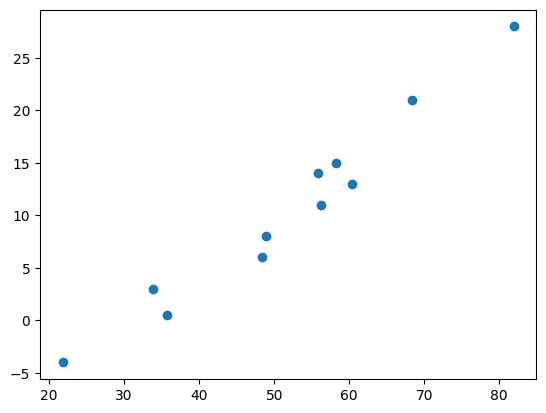

In [6]:
plt.scatter(t_u, t_c);

In [7]:
# Функция модели
def model(t_u, w, b):
    return w * t_u + b

In [8]:
# Функция потерь (среднеквадратичная)
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [9]:
# Задаем начельные значения параметров
w = torch.ones(())
b = torch.zeros(())
print(w, b)

tensor(1.) tensor(0.)


In [10]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [11]:
# Значение функции потерь
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

## Транслирование

In [12]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)

In [13]:
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [14]:
x

tensor(1.)

In [15]:
y

tensor([[1.],
        [1.],
        [1.]])

In [16]:
x * y

tensor([[1.],
        [1.],
        [1.]])

In [17]:
z

tensor([[1., 1., 1.]])

In [18]:
y * z

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [19]:
a

tensor([[[1.]],

        [[1.]]])

In [20]:
y * a

tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])

In [21]:
z * a

tensor([[[1., 1., 1.]],

        [[1., 1., 1.]]])

In [22]:
y * z * a

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

## Gradient Descent

In [23]:
delta = 0.1
learning_rate = 1e-2 # скорость обучения

In [24]:
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [25]:
w = w - learning_rate * loss_rate_of_change_w

In [26]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [27]:
b = b - learning_rate * loss_rate_of_change_b

### Вычисление производных

In [28]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [29]:
def dmodel_dw(t_u, w, b):
    return t_u

In [30]:
def dmodel_db(t_u, w, b):
    return 1.0

### Определение функции градиента

In [31]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

### Подгонка модели в цикле

In [32]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, 
                  print_params=True):
    for epoch in range(1, n_epochs +1):
        w, b = params
        
        t_p = model(t_u, w, b) # прямой проход
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) # обратный проход

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('   Params:', params)
                print('   Grad:  ', grad)
        if epoch in {4, 12, 101}:
                print('...')

        if not torch.isfinite(loss).all():
            break        

    return params    

### Запускаем цикл обучения

In [33]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

Epoch 1, Loss 1763.884766
   Params: tensor([-44.1730,  -0.8260])
   Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
   Params: tensor([2568.4011,   45.1637])
   Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
   Params: tensor([-148527.7344,   -2616.3931])
   Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
   Params: tensor([3.2144e+17, 5.6621e+15])
   Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
   Params: tensor([-1.8590e+19, -3.2746e+17])
   Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [34]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

Epoch 1, Loss 1763.884766
   Params: tensor([ 0.5483, -0.0083])
   Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
   Params: tensor([ 0.3623, -0.0118])
   Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
   Params: tensor([ 0.2858, -0.0135])
   Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
   Params: tensor([ 0.2324, -0.0166])
   Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
   Params: tensor([ 0.2323, -0.0169])
   Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
   Params: tensor([ 0.2327, -0.0435])
   Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
   Params: tensor([ 0.2327, -0.0438])
   Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

### Нормализация входных сигналов

In [35]:
t_un = t_u * 0.1

In [36]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

Epoch 1, Loss 80.364342
   Params: tensor([1.7761, 0.1064])
   Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
   Params: tensor([2.0848, 0.1303])
   Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
   Params: tensor([2.2094, 0.1217])
   Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
   Params: tensor([ 2.3232, -0.0710])
   Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
   Params: tensor([ 2.3284, -0.1003])
   Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
   Params: tensor([ 2.7508, -2.4910])
   Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
   Params: tensor([ 2.7553, -2.5162])
   Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [37]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
    print_params = False
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...


Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


In [38]:
params

tensor([  5.3671, -17.3012])

### Визуализиреум

In [42]:
t_p = model(t_un, *params)

t_p

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])

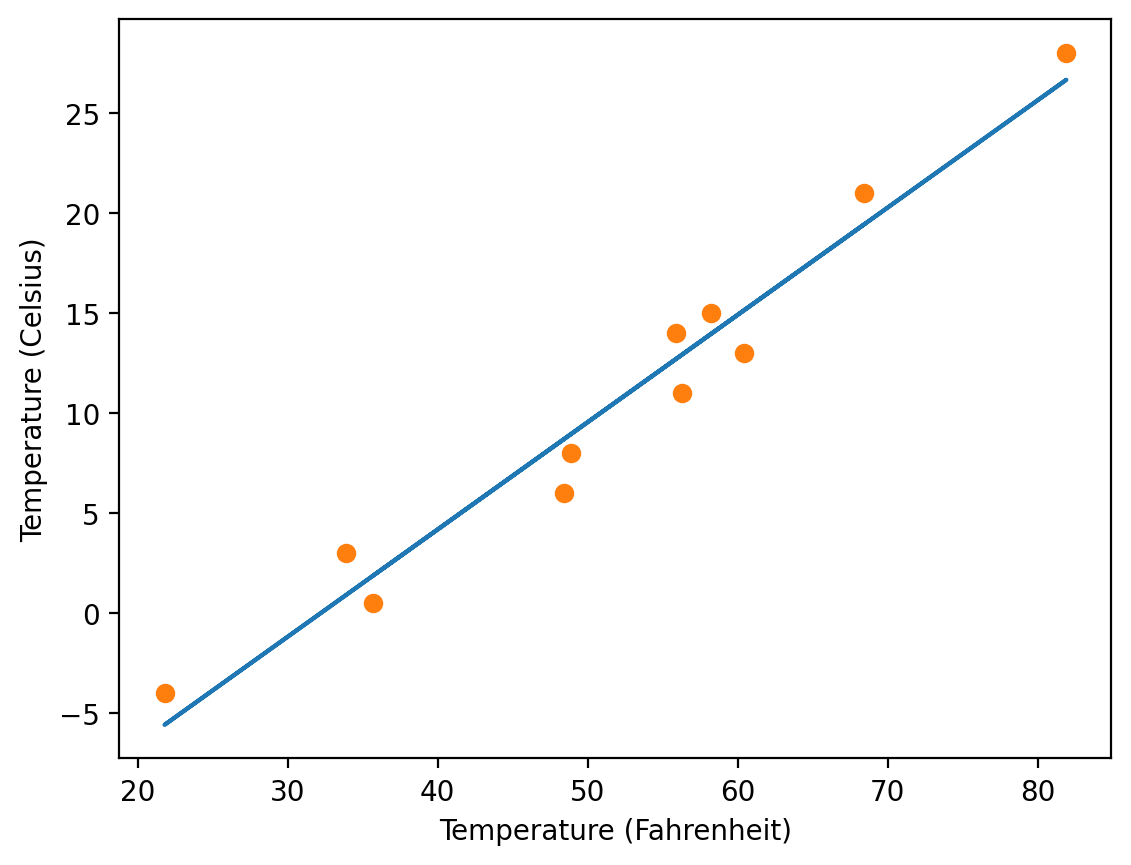

In [45]:
fig = plt.figure(dpi=200)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o');
